In [1]:
#Import modules

import torch
import torchvision
import torch
import torchvision.transforms as transforms
import numpy as np
import cv2
from time import time
from PIL import Image
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [2]:
#Load Model

cwd = os.getcwd() #gets current working directory
Path_model = os.path.join(cwd, "Trained_Models/shufflenet_v2_x1_0_trained_model.pt") #joins the path of cwd and file name

#model = torch.load(Path_model)
model = torch.load(Path_model, map_location=torch.device('cpu'))
model.eval()
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
#Frame Builder for the model

transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Resize((256, 256))
    ])

def frame_builder(img_path, transform):
        image = Image.open(img_path)
        image = image.convert("RGB")
        image = transform(image)
        image = torch.unsqueeze(image,0)
        return (image)
    
def frame_builder_wc(image, transform):
        image = image.convert("RGB")
        image = transform(image)
        image = torch.unsqueeze(image,0)
        return (image)

In [4]:
#Frame classifier

def frame_classifier(prediction):
    if (prediction == 0):
        return ('down')
    if (prediction == 1):
        return ('left')
    if (prediction == 2):
        return ('right')
    if (prediction == 3):
        return ('up')


In [5]:
#######################1 picture test

frame_path = os.path.join(cwd, "Arm positions images/down_21.jpg")

frame = frame_builder(frame_path, transform = transform)
#frame = torch.unsqueeze(frame,0)
#print(frame.shape)

#predict 

output = model(frame)

prediction = int(torch.max(output.data, 1)[1].numpy())

prediction = frame_classifier(prediction)
print(prediction)

down


In [6]:
###################1 frame test

stream = cv2.VideoCapture(0) # 0 means read from local camera.

In [7]:
ret,frame_cam = stream.read() # return a single frame in variable `frame`

while(True):
    cv2.imshow('img1',frame_cam) #display the captured image
    if cv2.waitKey(1) & 0xFF == ord('y'): #save on pressing 'y' 
        cv2.imwrite('images/c1.png',frame_cam)
        cv2.destroyAllWindows()
        break

stream.release()

In [8]:
#Transform Cv-2 image to Pil image

print("Image Shape:", frame_cam.shape)

#cv2.imshow('image',frame_cam)
#cv2.waitKey(0)

frame_cam_pil = Image.fromarray(frame_cam)
#frame_cam_pil.show()

Image Shape: (480, 640, 3)


In [9]:
#Apply the model to webcam frame

frame_cam_transf = frame_builder_wc(frame_cam_pil, transform = transform)
#print(frame_cam_transf.shape)

output_frame = model(frame_cam_transf)

prediction_frame = int(torch.max(output_frame.data, 1)[1].numpy())
print(prediction_frame)

prediction_frame = frame_classifier(prediction_frame)
print(prediction_frame) 

0
down


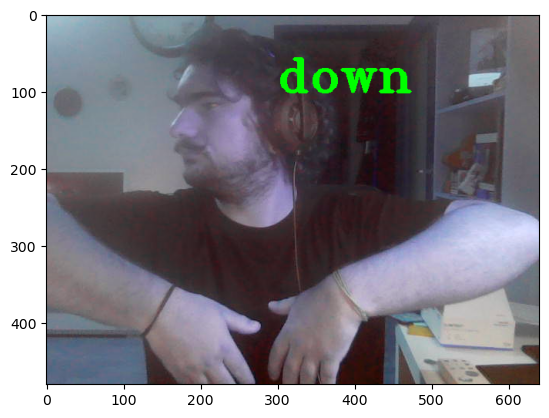

In [10]:
#print prediction over picture

cv2.putText(img=frame_cam, text=prediction_frame, org=(300, 100), fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=2, color=(0, 255, 0),thickness=3)

plt.imshow(frame_cam)